# Step 3: Data Validation

Use the code below to run TensorFlow Data Validation on your pipeline.  Start by importing and opening the metadata store.

In [1]:
from __future__ import print_function

import os
import tfx_utils
%matplotlib notebook
# %matplotlib widget
# from IPython.display import display_html
import pandas as pd
pd.set_option("max_colwidth", 100)

def _make_default_sqlite_uri(pipeline_name):
    return os.path.join('/home/tfx/tfx/metadata', pipeline_name, 'metadata.db')

def get_metadata_store(pipeline_name):
    return tfx_utils.TFXReadonlyMetadataStore.from_sqlite_db(_make_default_sqlite_uri(pipeline_name))

# pipeline_name = 'taxi'
pipeline_name = 'taxi_solution'

pipeline_db_path = _make_default_sqlite_uri(pipeline_name)
print('Pipeline DB:\n{}'.format(pipeline_db_path))

2021-09-29 22:03:50.747646: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-29 22:03:50.747713: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Pipeline DB:
/home/tfx/tfx/metadata/taxi_solution/metadata.db


In [2]:
store = get_metadata_store(pipeline_name)

In [3]:
store.get_artifacts()

,URI,SPLIT_NAMES,TFX_VERSION,STATE,INPUT_FINGERPRINT,PAYLOAD_FORMAT,FILE_FORMAT,SPAN,NAME,PRODUCER_COMPONENT,CURRENT_MODEL_ID,BLESSED,CURRENT_MODEL,PUSHED_DESTINATION,PUSHED,PUSHED_VERSION
ID,,,,,,,,,,,,,,,,
1,/opt/airflow/tfx/pipelines/taxi_solution/CsvExampleGen/examples/1,"[""train"", ""eval""]",1.2.0,published,"split:single_split,num_files:1,total_bytes:1922668,xor_checksum:1632951534,sum_checksum:1632951534",FORMAT_TF_EXAMPLE,tfrecords_gzip,,-,-,-,-,-,-,-,-
2,/opt/airflow/tfx/pipelines/taxi_solution/StatisticsGen/statistics/2,"[""train"", ""eval""]",1.2.0,published,-,-,-,-,statistics,StatisticsGen,-,-,-,-,-,-
3,/opt/airflow/tfx/pipelines/taxi_solution/SchemaGen/schema/3,-,1.2.0,published,-,-,-,-,schema,SchemaGen,-,-,-,-,-,-
4,/opt/airflow/tfx/pipelines/taxi_solution/Transform/transform_graph/4,-,1.2.0,published,-,-,-,-,transform_graph,Transform,-,-,-,-,-,-
5,/opt/airflow/tfx/pipelines/taxi_solution/Transform/transformed_examples/4,"[""train"", ""eval""]",1.2.0,published,-,-,-,-,transformed_examples,Transform,-,-,-,-,-,-
6,/opt/airflow/tfx/pipelines/taxi_solution/Transform/updated_analyzer_cache/4,-,1.2.0,published,-,-,-,-,updated_analyzer_cache,Transform,-,-,-,-,-,-
7,/opt/airflow/tfx/pipelines/taxi_solution/Transform/pre_transform_schema/4,-,1.2.0,published,-,-,-,-,pre_transform_schema,Transform,-,-,-,-,-,-
8,/opt/airflow/tfx/pipelines/taxi_solution/Transform/pre_transform_stats/4,-,1.2.0,published,-,-,-,-,pre_transform_stats,Transform,-,-,-,-,-,-
9,/opt/airflow/tfx/pipelines/taxi_solution/Transform/post_transform_schema/4,-,1.2.0,published,-,-,-,-,post_transform_schema,Transform,-,-,-,-,-,-


Now print out the data artifacts:

In [4]:
# Visualize properties of example artifacts
store.get_artifacts_of_type_df(tfx_utils.TFXArtifactTypes.EXAMPLES)

,URI,SPLIT_NAMES,INPUT_FINGERPRINT,PAYLOAD_FORMAT,FILE_FORMAT,STATE,SPAN,TFX_VERSION,NAME,PRODUCER_COMPONENT
ID,,,,,,,,,,
1,/opt/airflow/tfx/pipelines/taxi_solution/CsvExampleGen/examples/1,"[""train"", ""eval""]","split:single_split,num_files:1,total_bytes:1922668,xor_checksum:1632951534,sum_checksum:1632951534",FORMAT_TF_EXAMPLE,tfrecords_gzip,published,,1.2.0,-,-
5,/opt/airflow/tfx/pipelines/taxi_solution/Transform/transformed_examples/4,"[""train"", ""eval""]",-,-,-,published,-,1.2.0,transformed_examples,Transform


In [5]:
store.get_dest_artifact_of_type(1, tfx_utils.TFXArtifactTypes.EXAMPLE_STATS)

id: 2
type_id: 16
uri: "/opt/airflow/tfx/pipelines/taxi_solution/StatisticsGen/statistics/2"
properties {
  key: "split_names"
  value {
    string_value: "[\"train\", \"eval\"]"
  }
}
custom_properties {
  key: "name"
  value {
    string_value: "statistics"
  }
}
custom_properties {
  key: "producer_component"
  value {
    string_value: "StatisticsGen"
  }
}
custom_properties {
  key: "state"
  value {
    string_value: "published"
  }
}
custom_properties {
  key: "tfx_version"
  value {
    string_value: "1.2.0"
  }
}
state: LIVE
create_time_since_epoch: 1632952539269
last_update_time_since_epoch: 1632952554042

Now visualize the dataset features.

Hint: try ID 2 or 3

In [6]:
# Visualize stats for data
store.display_stats_for_examples(1)

READING /opt/airflow/tfx/pipelines/taxi_solution/StatisticsGen/statistics/2/Split-train/FeatureStats.pb


In [7]:
# visualize_artifacts([store.get_artifact_df(2)])
store.get_artifact_df(2)

,
URI,/opt/airflow/tfx/pipelines/taxi_solution/StatisticsGen/statistics/2
SPLIT_NAMES,"[""train"", ""eval""]"
NAME,statistics
STATE,published
TFX_VERSION,1.2.0
PRODUCER_COMPONENT,StatisticsGen


Now plot the artifact lineage:

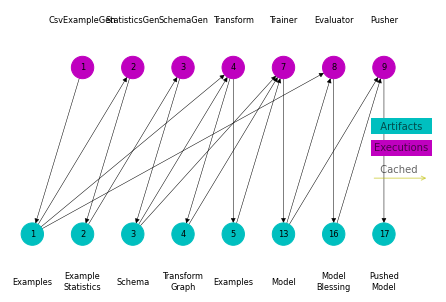

In [9]:
# Try different IDs here. Click stop in the plot when changing IDs.
%matplotlib inline
store.plot_artifact_lineage(17)